### 相关系数

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("factor_returns.csv")
data = data.iloc[:, 1:-2]

/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


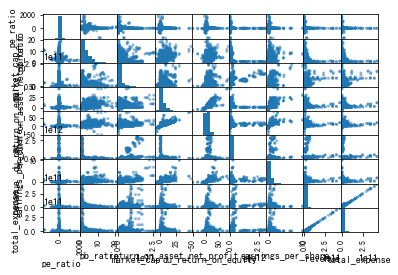

In [17]:
pd.scatter_matrix(data)
plt.show()

In [18]:
data.head()

,pe_ratio,pb_ratio,market_cap,return_on_asset_net_profit,du_return_on_equity,ev,earnings_per_share,revenue,total_expense
0,5.9572,1.1818,8.525255e+10,0.8008,14.9403,1.211445e+12,2.010,2.070140e+10,1.088254e+10
1,7.0289,1.5880,8.411336e+10,1.6463,7.8656,3.002521e+11,0.326,2.930837e+10,2.378348e+10
2,-262.7461,7.0003,5.170455e+08,-0.5678,-0.5943,7.705178e+08,-0.006,1.167983e+07,1.203008e+07
3,16.4760,3.7146,1.968046e+10,5.6036,14.6170,2.800916e+10,0.350,9.189387e+09,7.935543e+09
4,12.5878,2.5616,4.172721e+10,2.8729,10.9097,8.124738e+10,0.271,8.951453e+09,7.091398e+09


### instacart案例-降维

In [4]:
# 获取数据
order_products = pd.read_csv("./instacart/order_products_prior.csv")
products = pd.read_csv("./instacart/products.csv")
orders = pd.read_csv("./instacart/orders.csv")
aisles = pd.read_csv("./instacart/aisles.csv")

In [5]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
# 合并表
# aisles & products 以 aisle_id ---> product_id ---> order_id
tab1 = pd.merge(aisles, products, on=["aisle_id", "aisle_id"])
tab2 = pd.merge(tab1, order_products, on=["product_id", "product_id"])
tab3 = pd.merge(tab2, orders, on=["order_id", "order_id"])

In [ ]:
# 交叉表 user_id & aisle 之间的关系
pd.crosstab(tab3["user_id"], tab3["aisle"])

In [ ]:
# 降维
from sklearn.decomposition import PCA
# 1.实例化转换器类
transfer = PCA(n_components=0.9)

# 2.fit_transfrom()
data_new = transfer.fit_transform(data)

In [ ]:
data_new.shape

In [ ]:
x = data_new[:1000]

In [ ]:
from sklearn.cluster import KMeans
# 1.预估器流程
estimator = KMeans(n_clusters=4)
estimator.fit(x)

y_predict = estimator.predict(x)

In [ ]:
from sklearn.metrics import silhouette_score
# 2.模型评估
silhouette_score(x, y_predict)